<a href="https://colab.research.google.com/github/KhanhChinh12/TourDeFrance/blob/main/tour_de_france.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import seaborn as sns

In [5]:
path_url = 'https://raw.githubusercontent.com/KhanhChinh12/TourDeFrance/main/tour_de_france.xlsx'

data = pd.read_excel(path_url, engine='openpyxl')

data.head(60)

,Year,Winner's avg speed,Total distance (km),Number of stages,Finishers,Entrants,Winner,Winner's Nationality,Winner's Team,Start Date,End Date,Starting city,Starting city Latitude,Starting city Longitude,Starting country,Finishing city,Finishing city Latitude,Finishing city Longitude
0,1903,25.68,2428.0,6,21,60,Maurice Garin,France,La Française,1903-07-01,1903-07-21,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
1,1904,25.27,2420.0,6,27,88,Henri Cornet,France,Cycles JC,1904-07-02,1904-07-24,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
2,1905,27.11,2994.0,11,24,60,Louis Trousselier,France,Cycles Peugeot,1905-07-09,1905-07-30,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
3,1906,24.46,4545.0,13,14,82,René Pottier,France,Cycles Peugeot,1906-07-04,1906-07-29,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
4,1907,28.47,4488.0,14,33,93,Lucien Petit-Breton,France,Cycles Peugeot,1907-07-08,1907-08-04,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
5,1908,28.74,4488.0,14,36,112,Lucien Petit-Breton,France,Cycles Peugeot,1908-07-13,1908-08-09,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
6,1909,28.66,4497.0,14,55,150,François Faber,Luxembourg,Alycon,1909-07-05,1909-08-01,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
7,1910,29.10,4737.0,15,41,110,Octave Lapize,France,Alycon,1910-07-03,1910-07-31,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
8,1911,27.32,5344.0,15,28,84,Gustave Garrigou,France,Alycon,1911-07-02,1911-07-30,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
9,1912,27.76,5289.0,15,41,131,Odile Defraye,Belgium,Alycon,1912-06-30,1912-07-28,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522


### Phân tích các trường dữ liệu:

- Year: Năm diễn ra sự kiện của giải đua Tour De France, bắt đầu từ năm 1903 đến năm 2016.
- Winner's avg speed: đây là tốc độ trung bình (km/h) của người chiến thắng trong cuộc đua ở mỗi giải.
- Total distance: Tổng chiều dài của chặng đua (km).
- Number of stages: Số lượng chặng đua trong từng năm.
- Finishers: Số lượng tay đua hoàn thành giải.
- Entrants: Số lượng tay đua tham gia từ đầu giải.
- Winner: Tên của người thắng cuộc.
- Winner's Nationality: Quốc tịch của người chiến thắng giải đua.
- Winner's Team: Tên đội đua của người thắng cuộc đại diện.
- Start Date và End Date: Ngày bắt đầu và kết thúc của giải đấu theo từng năm.
- Starting City và Finishing City: Thành phố xuất phát và kết thúc của cuộc đua.
- Starting City Latitude/Longitude và Finishing City Latitude/Longitude.

### Nhận xét tổng quan về dữ liệu:
- Dữ liệu thể hiện cho giải Tour De France bắt đầu từ năm 1903 và cho đến năm 2016.
- Trong đó tốc độ trung bình của người thắng có xu hướng tăng dần qua từng giải đua.
- Cùng với đó, tổng quãng đường mà mỗi tay đua phải vượt qua cũng tăng dần theo từng năm.
- Số tay đua hoàn thành và đăng ký cũng tăng dần theo từng năm. Cho thấy các điều kiện về việc nâng cao thể lực, thi đấu được cải thiện.


### Tốc độ trung bình của người thắng qua các năm

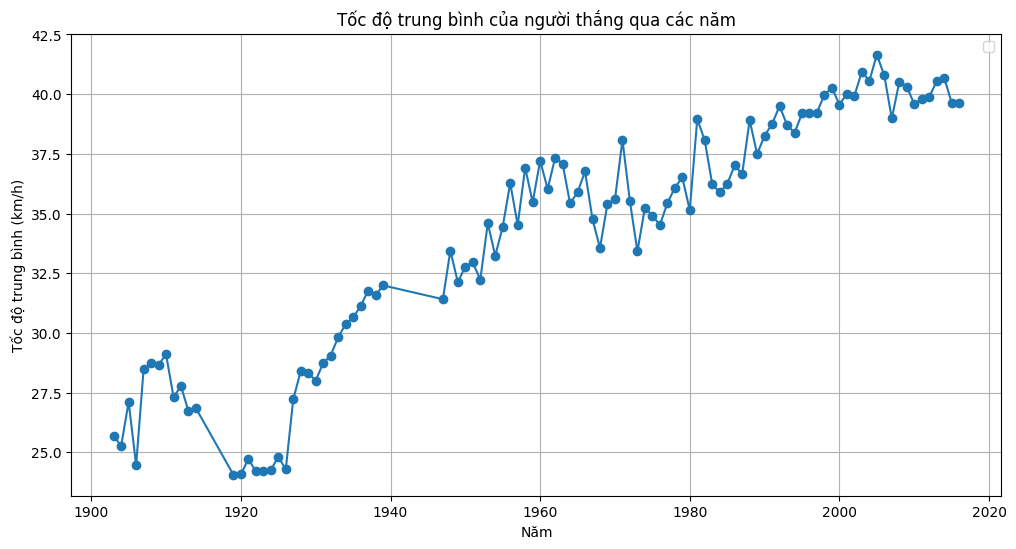

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(data['Year'], data['Winner\'s avg speed'], marker='o', linestyle='-')

plt.title('Tốc độ trung bình của người thắng qua các năm')
plt.xlabel('Năm')
plt.ylabel('Tốc độ trung bình (km/h)')
plt.grid(True)

plt.legend()
plt.show()

### Nhận xét:
- Qua đó, thấy được xu hướng tăng tốc độ trung bình của các tay đua qua thời gian của giải.
- Có một số giai đoạn giảm đột ngột về tốc độ có thể do trùng với các năm có chặng đua dài hoặc điều kiện thi đấu khó khăn hơn.

### Tổng chiều dài của giải đấu qua các năm

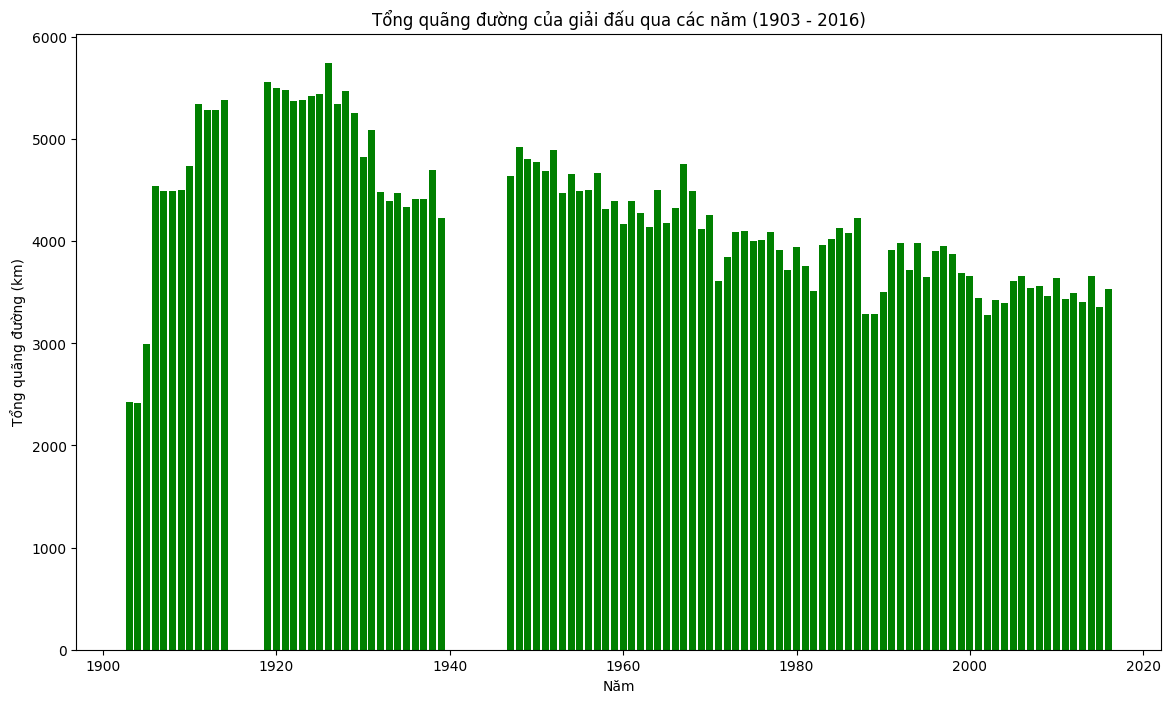

In [ ]:
plt.figure(figsize=(14, 8))

plt.bar(data['Year'], data['Total distance (km)'], color='green')

plt.title('Tổng quãng đường của giải đấu qua các năm (1903 - 2016)')
plt.xlabel('Năm')
plt.ylabel('Tổng quãng đường (km)')

plt.show()

### Nhận xét:
- Tổng chiều dài quãng đường có sự biến động lớn qua các năm. Có những năm quãng đường giảm xuống, đặc biệt trong giai đoạn Thế chiến.

### Số chặng đua qua các năm

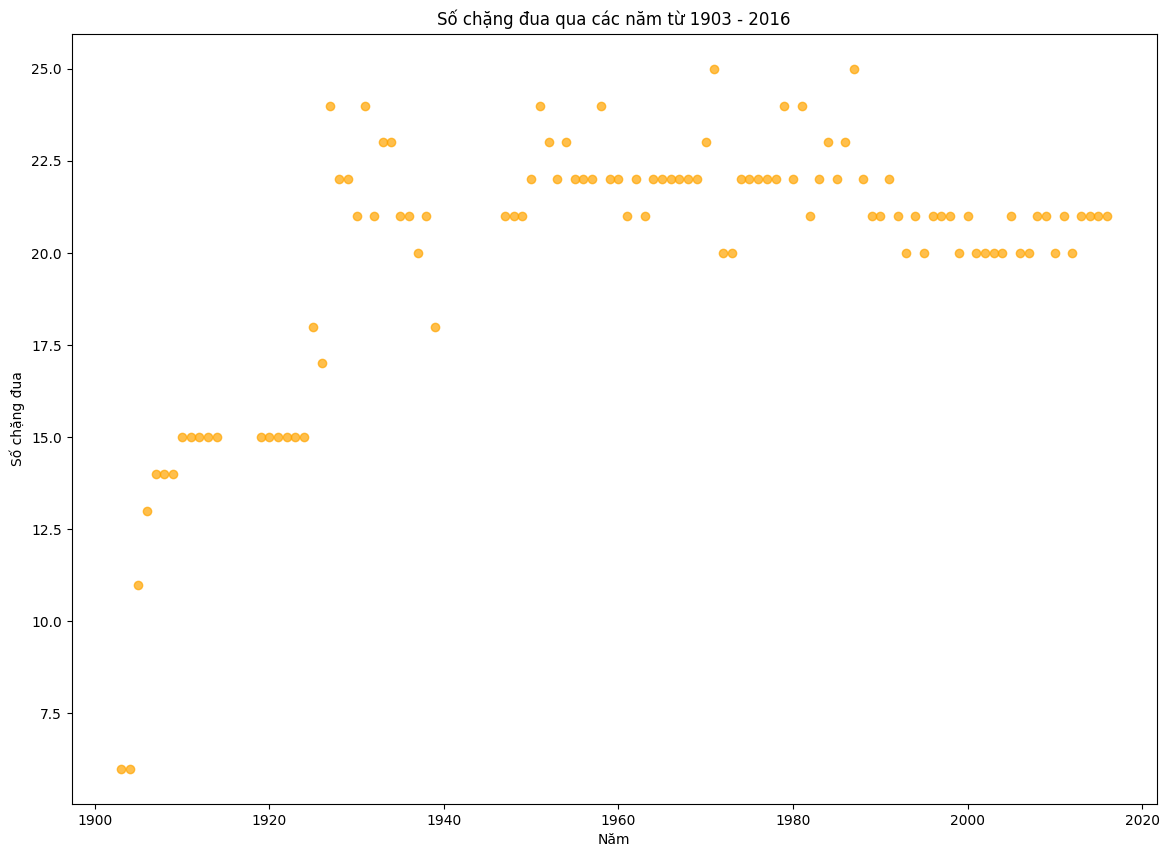

In [ ]:
plt.figure(figsize=(14, 10))

plt.scatter(data['Year'], data['Number of stages'], color = 'orange', alpha=0.7)

plt.title('Số chặng đua qua các năm từ 1903 - 2016')
plt.xlabel('Năm')
plt.ylabel('Số chặng đua')

plt.show()

### Nhận xét:
- Qua biểu đồ Scatter trên cho thấy, số chặng đua có sự thay đổi theo thời gian và cho thấy ban tổ chức đã điều chỉnh độ khó và thử thách của giải đấu.

### Số người tham gia qua các năm

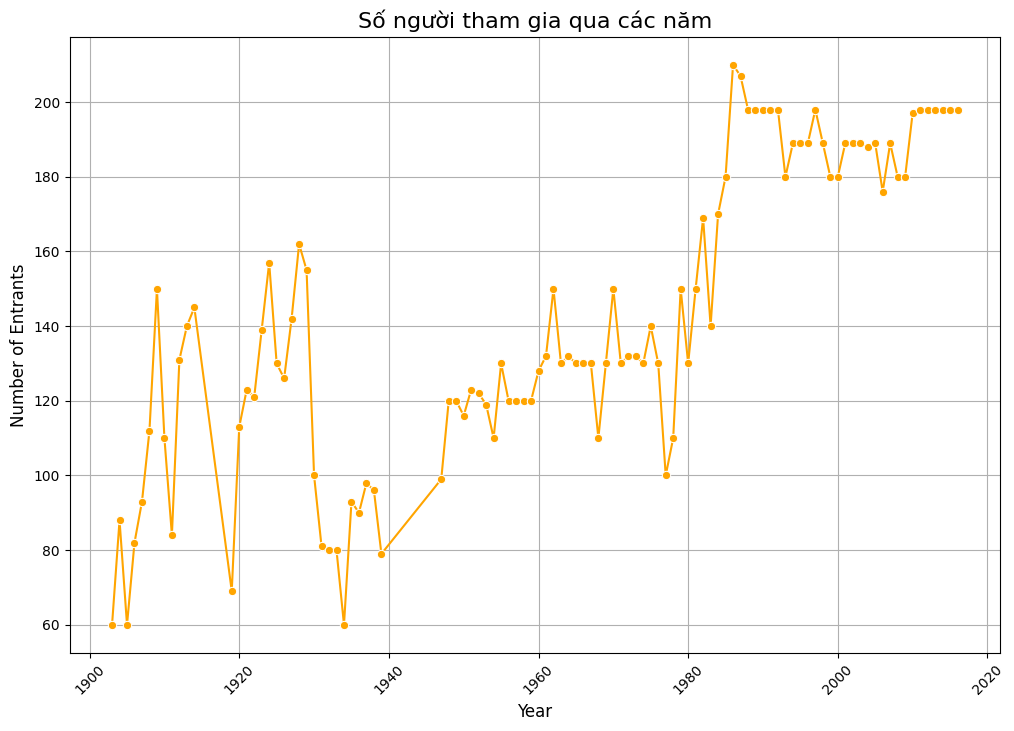

In [15]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x='Year', y='Entrants', marker='o', color='orange')

plt.title("Số người tham gia qua các năm", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Entrants", fontsize=12)

plt.xticks(rotation=45)
plt.grid(True)

plt.show()

### Số chặng và số người hoàn thành qua từng năm

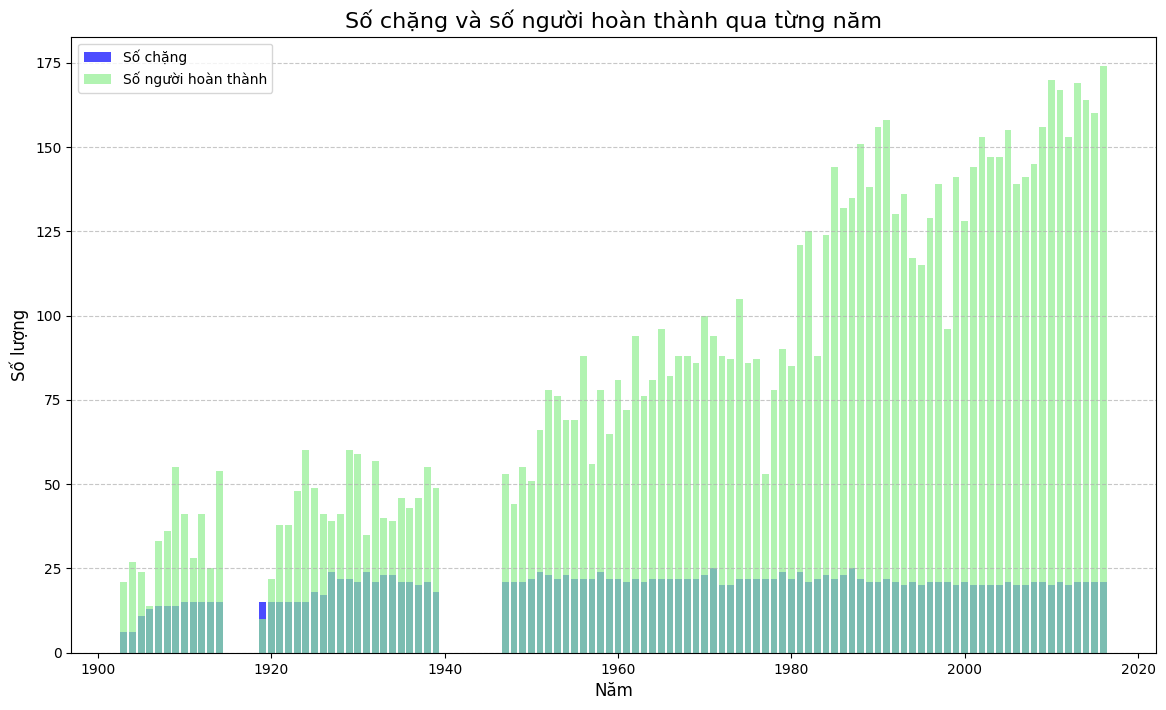

In [21]:
plt.figure(figsize=(14, 8))
plt.bar(data['Year'], data['Number of stages'], label='Số chặng', color='blue', alpha=0.7)
plt.bar(data['Year'], data['Finishers'], label='Số người hoàn thành', color='lightgreen', alpha=0.7)

plt.title('Số chặng và số người hoàn thành qua từng năm', fontsize=16)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Mối quan hệ giữa số chặng và số người hoàn thành

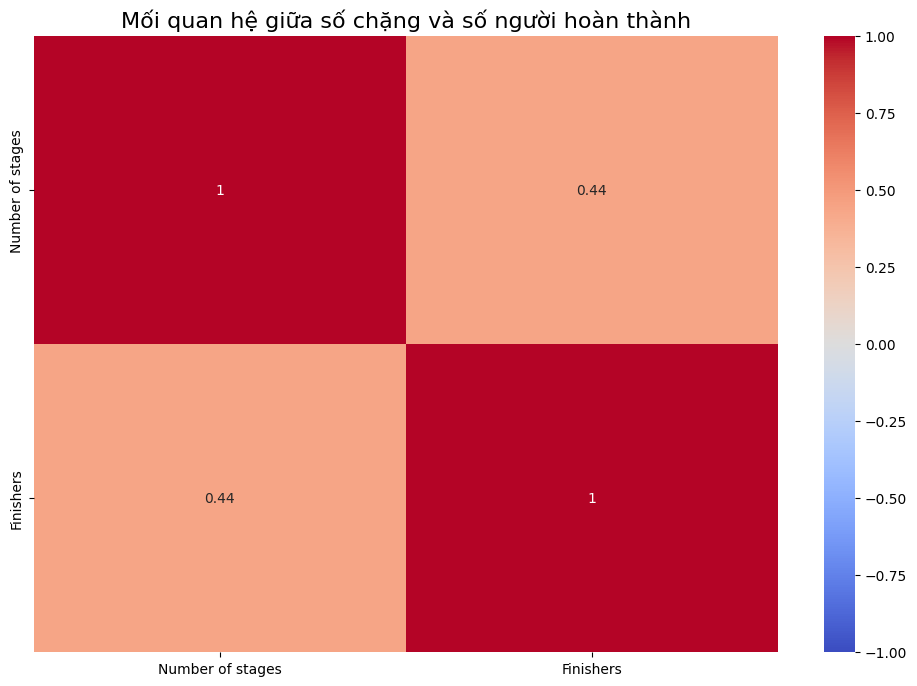

In [22]:
plt.figure(figsize=(12, 8))

sns.heatmap(data[['Number of stages', 'Finishers']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Mối quan hệ giữa số chặng và số người hoàn thành', fontsize=16)
plt.show()

### Phân tích số người hoàn thành và đăng ký giải đua

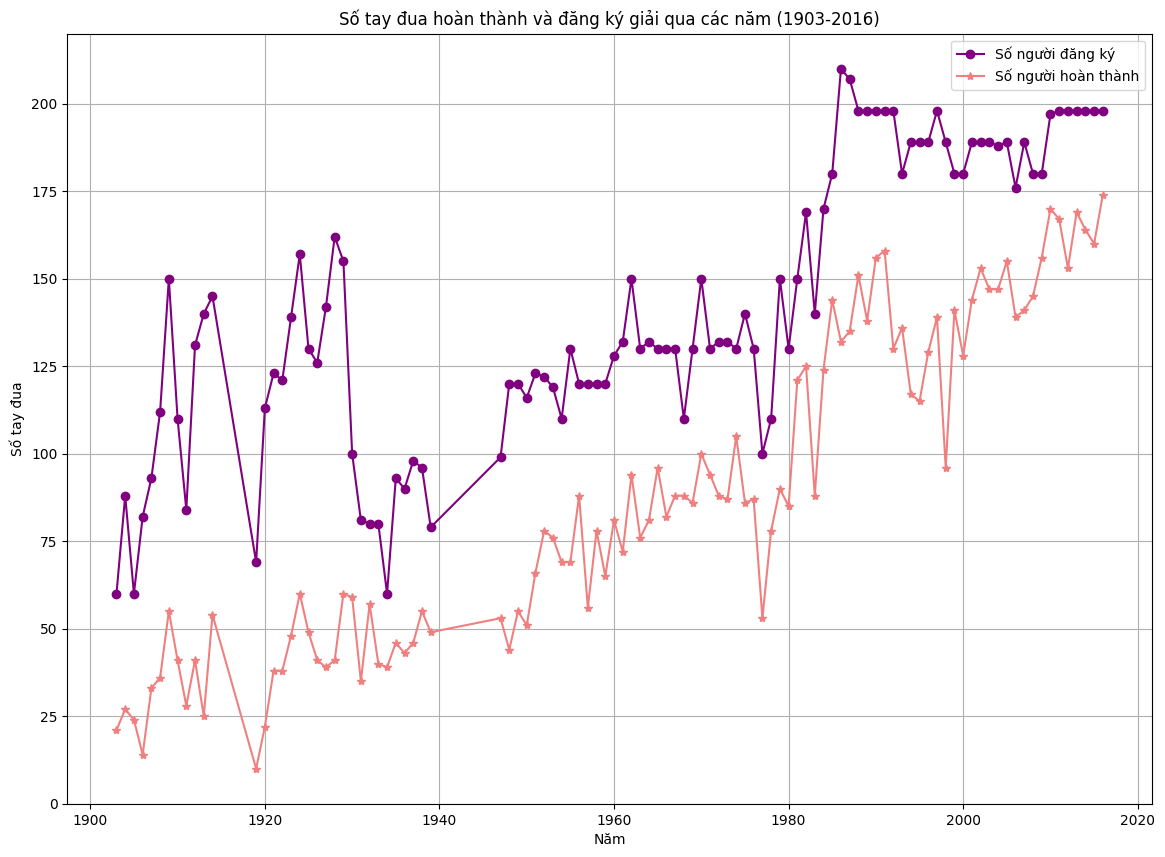

In [ ]:
plt.figure(figsize=(14, 10))

plt.plot(data['Year'], data['Entrants'], marker='o', linestyle='-', label='Số người đăng ký', color = 'purple')
plt.plot(data['Year'], data['Finishers'], marker='*', linestyle='-', label='Số người hoàn thành', color = 'lightcoral')

plt.title('Số tay đua hoàn thành và đăng ký giải qua các năm (1903-2016)')

plt.xlabel('Năm')
plt.ylabel('Số tay đua')

plt.grid(True)

plt.legend()
plt.show()

### Nhận xét:
- Qua biểu đồ cho thấy tỷ lệ giữa số lượng người đăng ký và hoàn thành giải đua có sự chênh lệch lớn.
- Phản ánh mức độ khắc nghiệt của giải đấu khi số lượng người có thể hoàn thành giải đua thấp hơn nhiều so với tổng số người đã đăng ký.

### Quốc tịch của người thắng cuộc

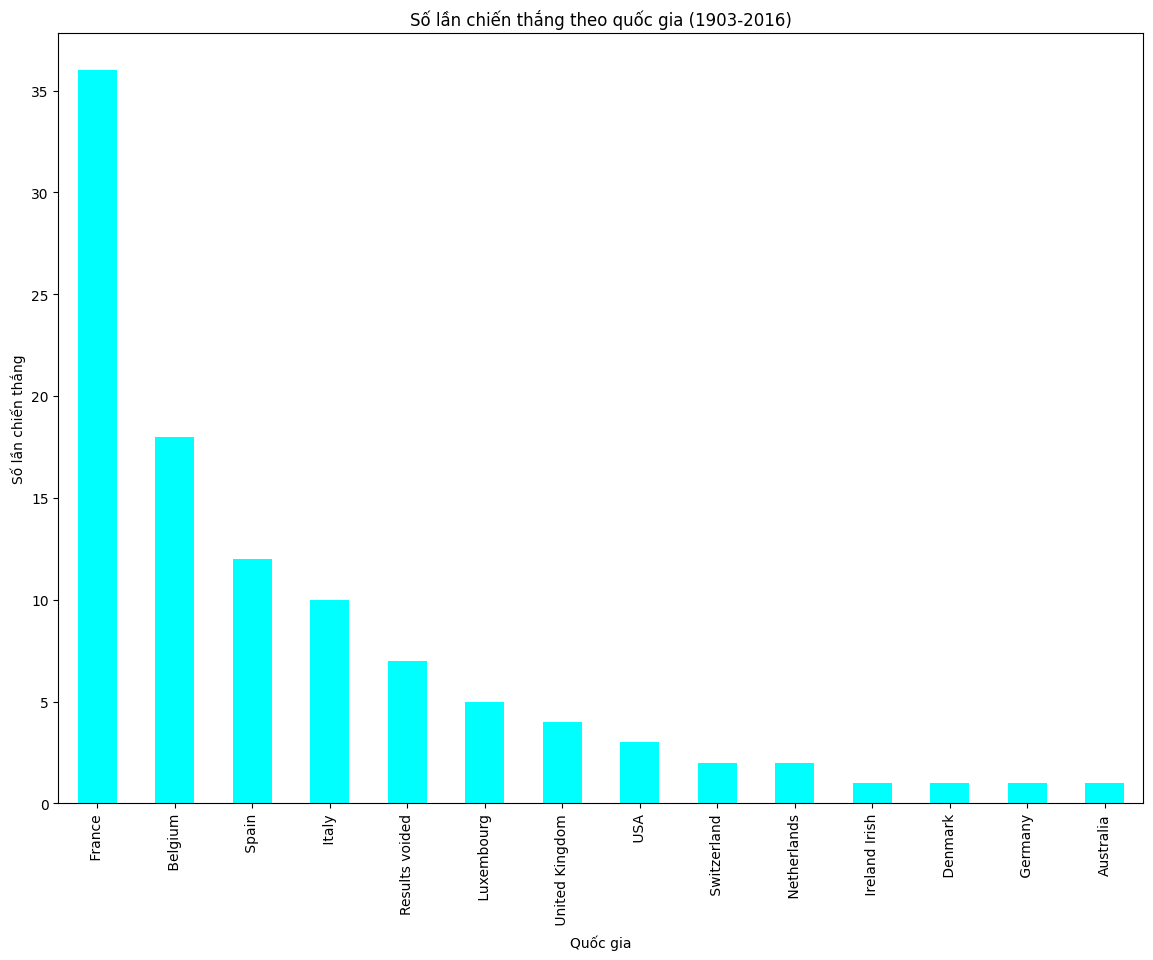

In [ ]:
nationality_counts = data["Winner's Nationality"].value_counts()

plt.figure(figsize=(14, 10))
nationality_counts.plot(kind = 'bar', color = 'cyan')

plt.title('Số lần chiến thắng theo quốc gia (1903-2016)')
plt.xlabel('Quốc gia')
plt.ylabel('Số lần chiến thắng')

plt.show()

### Nhận xét:
- Qua biểu đồ trên cho thấy, Pháp là quốc gia có số lần vô địch nhiều nhất trong khoảng thời gian từ 1903 đến 2016.
- Theo sau lần lượt là các quốc gia như Bỉ, Tây Ban Nha và Ý với số lần chiến thắng giải thấp hơn Pháp khá nhiều.

### Tỷ lệ các tay đua hoàn thành giải đấu qua từng năm

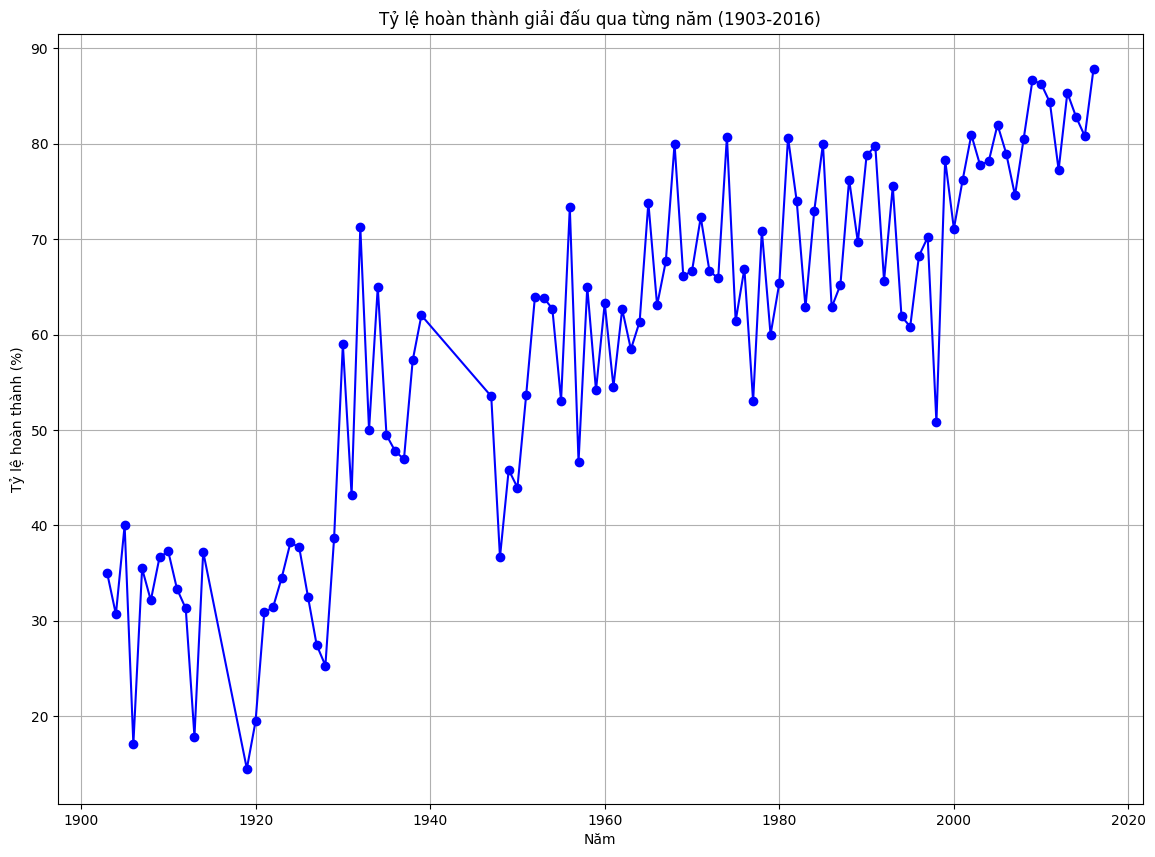

In [ ]:
data['Completion Rate'] = (data['Finishers'] / data['Entrants']) * 100

plt.figure(figsize=(14, 10))
plt.plot(data['Year'], data['Completion Rate'], marker='o', linestyle='-', color = 'blue')

plt.title('Tỷ lệ hoàn thành giải đấu qua từng năm (1903-2016)')

plt.xlabel('Năm')
plt.ylabel('Tỷ lệ hoàn thành (%)')

plt.grid(True)
plt.show()

### Nhận xét:
- Qua biểu đồ trên cho thấy tỉ lệ hoàn thành giải đấu tăng dần đều theo từng năm tổ chức giải.
- Tuy mỗi năm lại có sự biến động khác nhau về tỉ lệ hoàn thành nhưng so với những năm đầu tổ chức thì trong các năm gần đây, tỉ lệ các tay đua hoàn thành giải có sự tăng hơn.

### Số lần chiến thắng của các tay đua

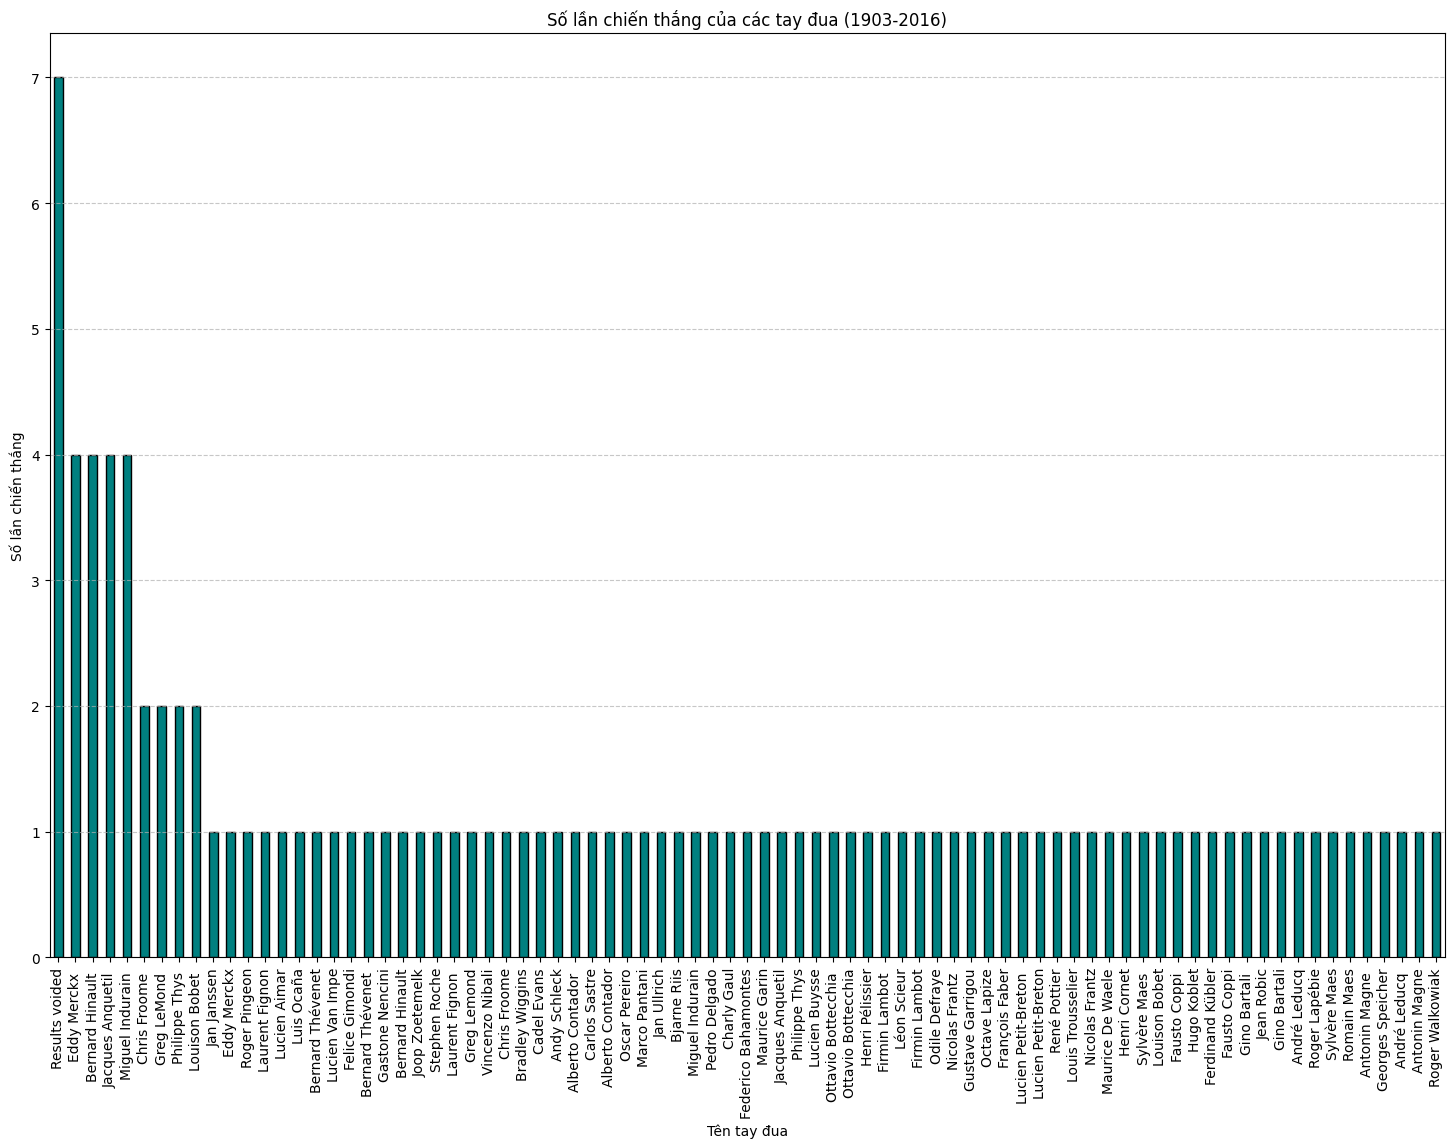

In [ ]:
win_counts = data['Winner'].value_counts()

plt.figure(figsize=(18, 12))
win_counts.plot(kind='bar', color='teal', edgecolor = 'black')

plt.title('Số lần chiến thắng của các tay đua (1903-2016)')

plt.xlabel('Tên tay đua')
plt.ylabel('Số lần chiến thắng')

plt.xticks(rotation=90)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

### Thành phố bắt đầu và kết thúc

